In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL
from model import Model
from train import parser

In [12]:
i = 30
org_pred = np.load('/HDD/Documents/UnsupervisedDepthAndPose/kitti_eval/kitti_eigen_depth_predictions.npy')
print(org_pred.shape)

(697, 128, 416)


In [3]:
path = '/HDD/Downloads/Datasets/raw_data_downloader/'
with open('/HDD/Documents/UnsupervisedDepthAndPose/data/kitti/test_files_eigen.txt','r') as f:
    lines = f.read().splitlines()
lines = [os.path.join(path,line) for line in lines]
print(len(lines))

697


In [11]:
depths_own = np.load("kitti_eval/kitti_eigen_depth_predictions_OWN.npy")
print(depths_own.shape)

(697, 128, 416)


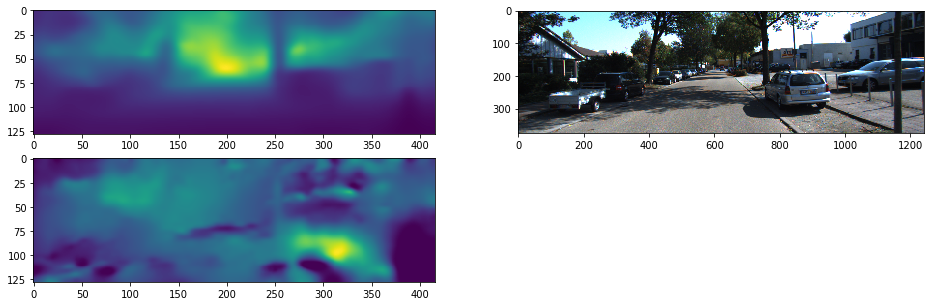

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.imshow(org_pred[i])
plt.subplot(2,2,2)
plt.imshow(PIL.Image.open(lines[i]))
plt.subplot(2,2,3)
plt.imshow(depths_own[i])

# Generating depths

In [5]:
args = vars(parser.parse_args(""))
args['seed'] = 1

model = Model(**args)
depths_pred = model.infere_depth(lines[600:],"chpts_2m_nomask/model-199999")

depths = depths_pred[0][:,:,:,0]

W1017 08:52:30.540297 140692009764672 deprecation_wrapper.py:119] From /HDD/Documents/UnsupervisedDepthAndPose/model.py:409: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1017 08:52:30.544818 140692009764672 deprecation_wrapper.py:119] From /HDD/Documents/UnsupervisedDepthAndPose/nets.py:101: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1017 08:52:31.151947 140692009764672 deprecation_wrapper.py:119] From /HDD/Documents/UnsupervisedDepthAndPose/nets.py:189: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W1017 08:52:31.341993 140692009764672 deprecation_wrapper.py:119] From /HDD/Documents/UnsupervisedDepthAndPose/nets.py:148: The name tf.image.resize_bilinear is deprecated. Please use tf.compat.v1.image.resize_bilinear instead.

W1017 08:52:31.518588 140692009764672 deprecation_wrapper.py:119] From /HDD/Documents/UnsupervisedDep

In [6]:
depths_own = np.load("kitti_eval/kitti_eigen_depth_predictions_OWN.npy")
depths_new = np.vstack((depths_own,depths))

In [7]:
#np.save("kitti_eval/kitti_eigen_depth_predictions_OWN.npy",depths_new)
#np.save("kitti_eval/kitti_eigen_depth_predictions_OWN.npy",depths)

In [8]:
depths_new.shape

(697, 128, 416)